 
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Lung Cancer Prediction Using Machine Learning </h1>

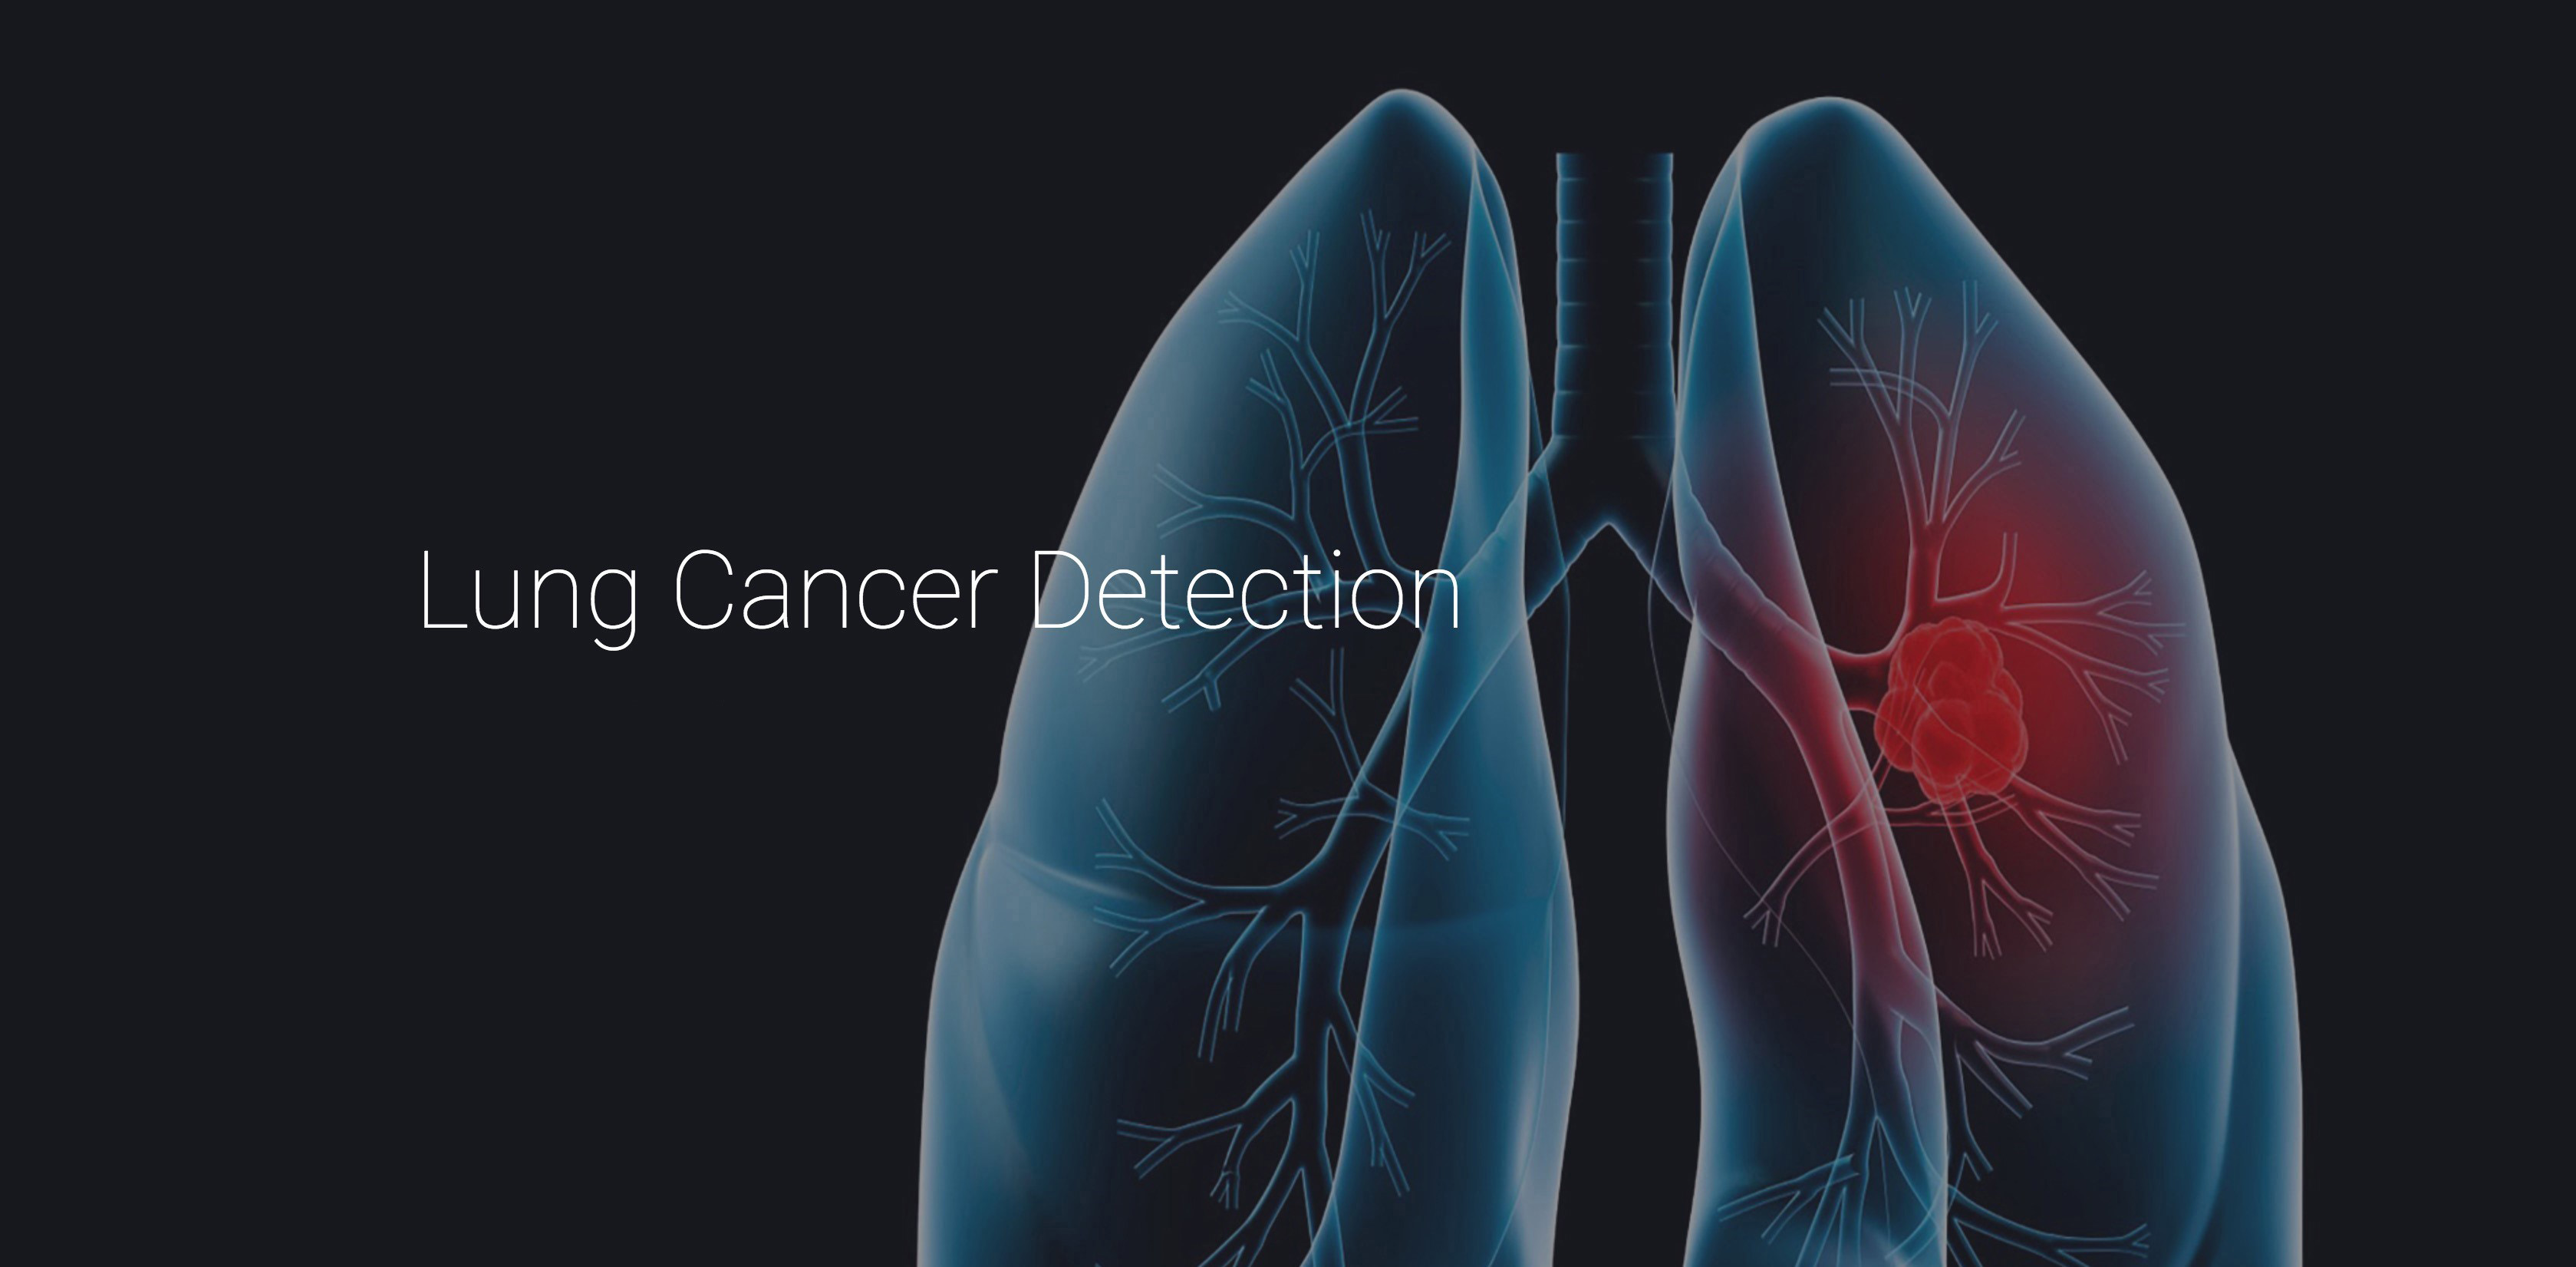

<a id="table"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. INTRODUCTION](#1)
    
* [2. IMPORT LIBRARIES](#2)
  
* [3. IMPORT DATASET](#3)

* [4. EDA](#4)

* [5. DATA VISUALIZATION ](#5)

* [6. MODEL BUILDING ](#6)

* [7. AUTHOR MESSAGE ](#7)


<a id="1"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Introduction</h1>

This study focuses on early stage lung cancer detection. Genetic K-Nearest Neighbour (GKNN) Algorithm is proposed for the detection which is a non parametric method. This optimization algorithm allows physicians to identify the nodules present in the CT lung images in the early stage hence the lung cancer. Since the manual interpretation of the lung cancer CT images are time consuming and very critical, to overcome this difficulty the Genetic Algorithm method is combined with K-Nearest Neighbour (K-NN) algorithm which would classify the cancer images quickly and effectively.

  The performance measures like the classification rate and the false positive rates are analyzed. In traditional K-NN algorithm, initially the distance between all the test and training samples are calculated and K-neighbours with greater distances are taken for classification. In this proposed method, by using Genetic Algorithm, K (50-100) numbers of samples are chosen for each iteration and the classification accuracy of 90% is achieved as fitness. The highest accuracy is recorded each time.

# Models to be used
- Support Vector Machine
- Random Forest Classifier
- KNeighborsClassifier
- Ann
- Voting Classifier
- Stacking Classifier
- Logistic Regression
- Decision Tree

<a id="2"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Importing Libraries</h1>

In [91]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<a id="3"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Importing Dataset</h1> 

In [92]:
dataset = pd.read_csv("dataset.csv")

<a id="4"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">EDA</h1> 

# EDA

Exploring data analysis

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [146]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [95]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [96]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

#There are no null values

In [97]:
dataset.shape

(3000, 16)

In [147]:
le = LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

In [148]:
dataset.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,0.010966,-0.028505,0.014412,-0.023891,0.010019,0.008488,0.002193,0.013211,-0.009284,-0.009173,-0.005534,0.012228,-0.016478,-0.001309,-0.016114
AGE,0.010966,1.000000,-0.020289,0.016101,0.030051,0.003850,-0.025655,-0.002322,0.024915,-0.018212,-0.020704,-0.024909,-0.015873,-0.001688,-0.005426,-0.035712
SMOKING,-0.028505,-0.020289,1.000000,-0.001497,-0.055562,-0.032041,0.045697,0.019635,0.004908,0.000571,0.003022,0.011722,-0.015772,-0.001706,-0.031387,0.014219
YELLOW_FINGERS,0.014412,0.016101,-0.001497,1.000000,0.012342,0.011394,-0.013216,-0.010761,-0.005709,0.004151,0.027167,0.010076,-0.034018,0.018590,-0.006595,0.013003
ANXIETY,-0.023891,0.030051,-0.055562,0.012342,1.000000,-0.024692,0.016903,-0.006250,-0.001174,-0.016065,-0.001542,-0.017082,-0.034967,0.033762,0.015969,-0.014525
PEER_PRESSURE,0.010019,0.003850,-0.032041,0.011394,-0.024692,1.000000,-0.021299,-0.017378,0.011361,-0.011344,0.013967,-0.012627,-0.028723,0.015962,-0.039339,-0.024644
CHRONIC_DISEASE,0.008488,-0.025655,0.045697,-0.013216,0.016903,-0.021299,1.000000,0.011071,-0.019597,0.022108,-0.028341,-0.003747,-0.020212,0.016406,-0.013951,-0.010235
FATIGUE,0.002193,-0.002322,0.019635,-0.010761,-0.006250,-0.017378,0.011071,1.000000,0.004944,0.015227,0.000309,-0.001560,0.029519,0.010244,0.024617,0.002249
ALLERGY,0.013211,0.024915,0.004908,-0.005709,-0.001174,0.011361,-0.019597,0.004944,1.000000,0.005405,-0.011772,-0.045632,-0.042363,0.012946,0.018704,0.006508
WHEEZING,-0.009284,-0.018212,0.000571,0.004151,-0.016065,-0.011344,0.022108,0.015227,0.005405,1.000000,-0.004093,0.016118,-0.012132,-0.023449,-0.016015,-0.038606


<a id="5"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Data Visualization</h1>  

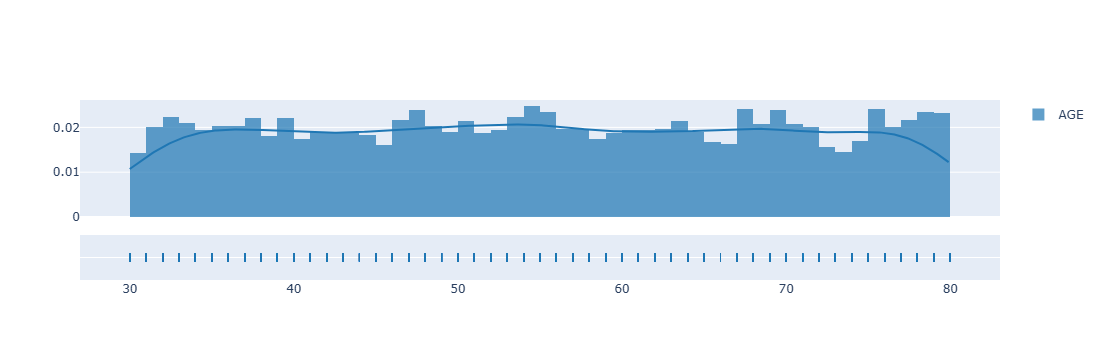

In [100]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE'] 
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

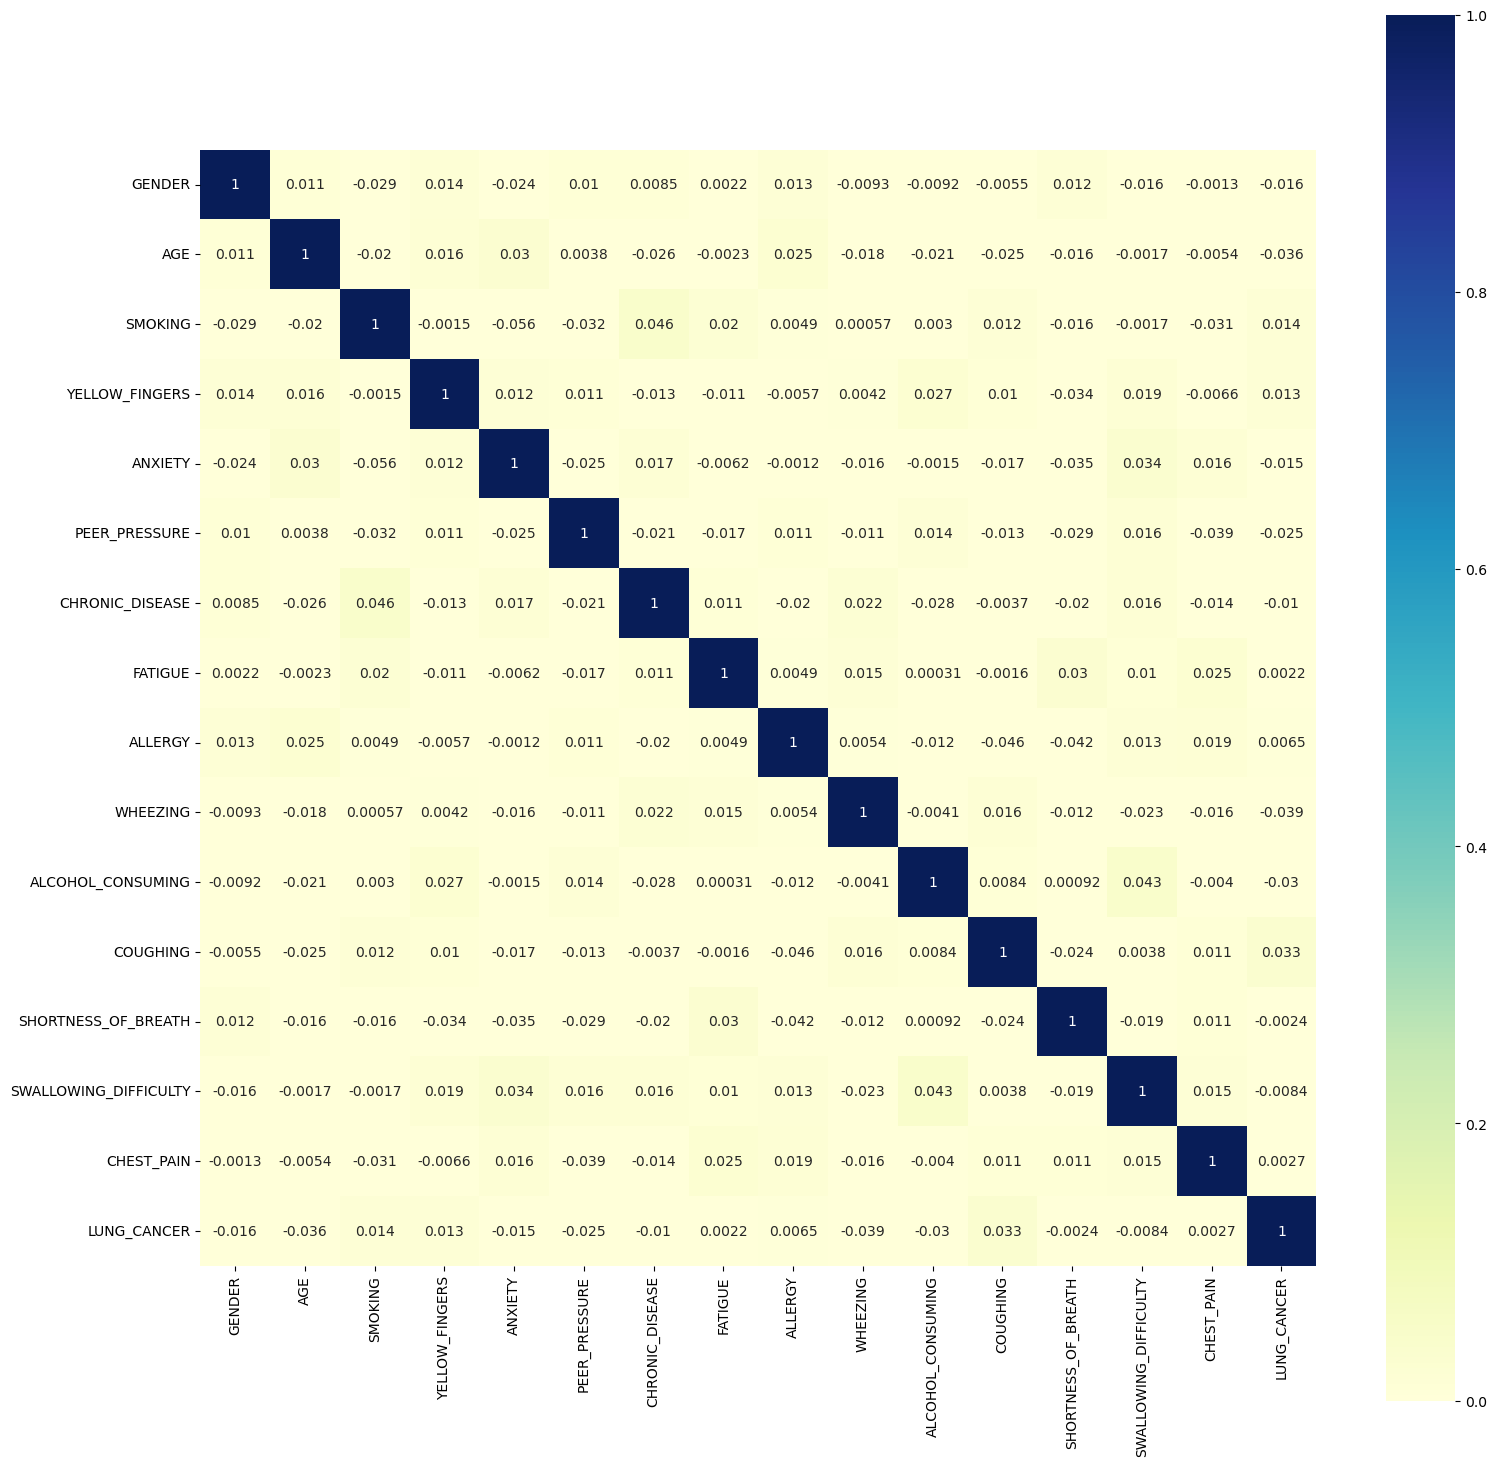

In [33]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

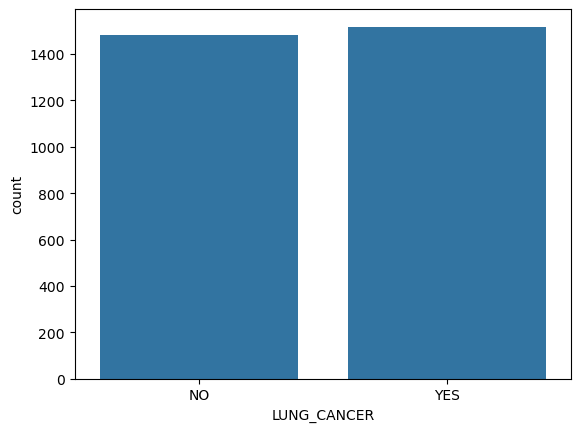

In [101]:
sns.countplot(x = 'LUNG_CANCER',data = dataset)

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

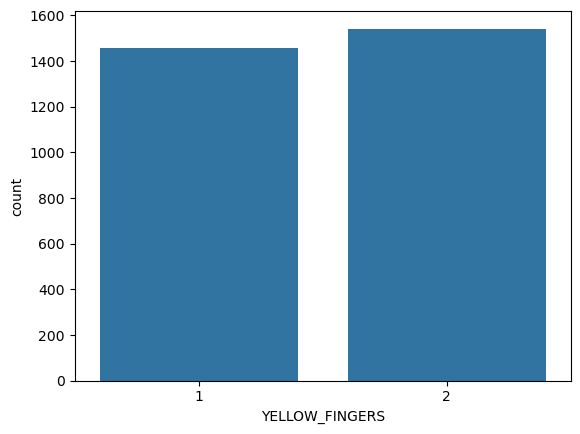

In [102]:
sns.countplot(x = 'YELLOW_FINGERS',data = dataset)

In [103]:
dataset['ANXIETY'].unique()

array([1, 2])

unique values

In [104]:
dataset['PEER_PRESSURE'].unique()

array([2, 1])

unique values

<Axes: xlabel='CHRONIC_DISEASE', ylabel='count'>

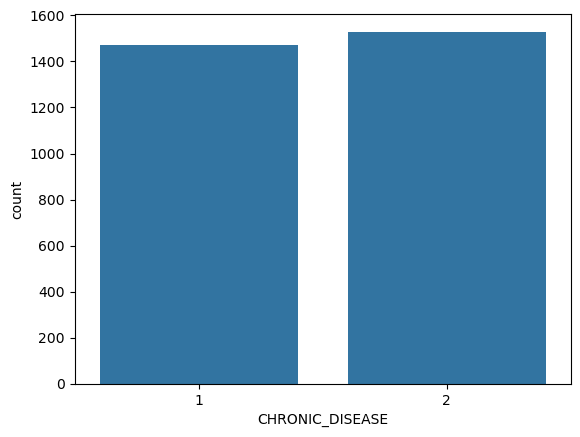

In [105]:
sns.countplot(x = 'CHRONIC_DISEASE',data = dataset)

In [106]:
dataset['YELLOW_FINGERS'].unique()

array([1, 2])

unique values

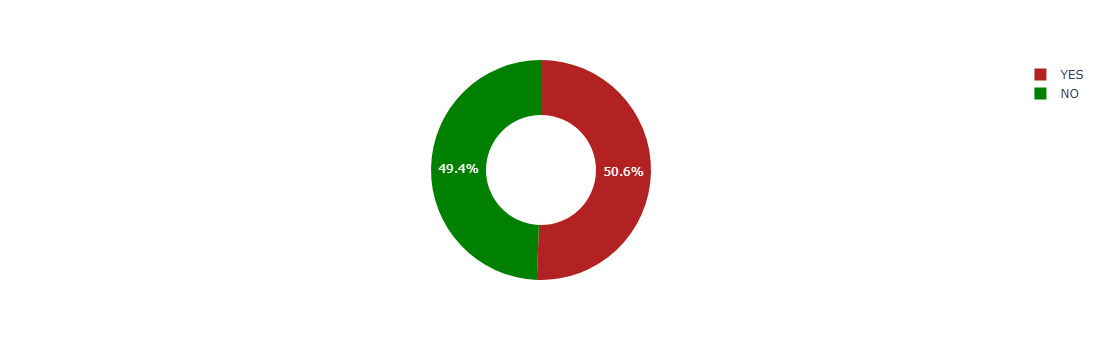

In [107]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

# Label encoding categorical variables

In [108]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

#GENDER 1 = Male 0 = Female LUNG CANCER 1 = YES 0 = NO

In [109]:
dataset['GENDER']

0       1
1       0
2       0
3       1
4       0
       ..
2995    0
2996    0
2997    0
2998    1
2999    1
Name: GENDER, Length: 3000, dtype: int64

In [110]:
dataset['LUNG_CANCER']

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 3000, dtype: int64

In [111]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,2,1,1,2,2,1,1,1,1,2,1,1,2,0
2996,0,75,1,2,1,1,1,2,2,2,2,1,1,2,1,0
2997,0,62,2,2,2,1,2,2,2,2,1,1,2,2,2,1
2998,1,30,1,1,2,2,2,2,2,2,2,1,2,1,2,1


In [112]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
WHEEZING                 0.038606
AGE                      0.035712
COUGHING                 0.033087
ALCOHOL_CONSUMING        0.030465
PEER_PRESSURE            0.024644
GENDER                   0.016114
ANXIETY                  0.014525
SMOKING                  0.014219
YELLOW_FINGERS           0.013003
CHRONIC_DISEASE          0.010235
SWALLOWING_DIFFICULTY    0.008421
ALLERGY                  0.006508
CHEST_PAIN               0.002699
SHORTNESS_OF_BREATH      0.002380
FATIGUE                  0.002249
Name: LUNG_CANCER, dtype: float64


# Feature Selection based on correlation

In [113]:
X = dataset.drop(['AGE','GENDER','SHORTNESS_OF_BREATH','SMOKING','LUNG_CANCER'],axis=1)

In [114]:
X

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,1,2,2,1,2,2,2,2,2,1
1,2,2,1,1,2,2,2,1,1,2,2
2,2,1,1,1,2,1,2,1,1,1,1
3,1,1,1,2,1,2,1,1,2,2,2
4,1,2,1,1,2,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,2,2,1,1,1,1,2,1,2
2996,2,1,1,1,2,2,2,2,1,2,1
2997,2,2,1,2,2,2,2,1,1,2,2
2998,1,2,2,2,2,2,2,2,1,1,2


In [115]:
y = dataset['LUNG_CANCER']

In [116]:
y

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 3000, dtype: int64

<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Model Building</h1>   

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- Support Vector Machine
- Random Forest Classifier
- KNeighborsClassifier
- Ann
- Voting Classifier
- Stacking Classifier
- Logistic Regression
- Decision Tree


# Support Vector Machine

In [118]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  62.66666666666667 

*Confusion Matrix for SVM: 
[[167 120]
 [104 209]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       287
           1       0.64      0.67      0.65       313

    accuracy                           0.63       600
   macro avg       0.63      0.62      0.62       600
weighted avg       0.63      0.63      0.63       600



In [119]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

Accuracy : 0.6266666666666667


(np.float64(0.5818815331010453), np.float64(0.4441489361702128))

# Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  81.16666666666667 

*Confusion Matrix for RF: 
[[229  58]
 [ 55 258]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       287
           1       0.82      0.82      0.82       313

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [121]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.8116666666666666


(np.float64(0.7979094076655052), np.float64(0.4702258726899384))

# KNeighborsClassifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X, y)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  70.0 

*Confusion Matrix for KNN: 
[[192  95]
 [ 85 228]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       287
           1       0.71      0.73      0.72       313

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600



In [123]:
y_pred_knn = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.7


(np.float64(0.6689895470383276), np.float64(0.45714285714285713))

# ANN

In [124]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(X, y)
predictions = ANN.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for ANN: ", val4, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_test, predictions))

*Accuracy score for ANN:  54.333333333333336 

*Confusion Matrix for ANN: 
[[203  84]
 [190 123]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       287
           1       0.59      0.39      0.47       313

    accuracy                           0.54       600
   macro avg       0.56      0.55      0.54       600
weighted avg       0.56      0.54      0.53       600



In [125]:
y_pred_ann = ANN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ann)
cm
ann_result = accuracy_score(y_test,y_pred_ann)
print("Accuracy :",ann_result)
recall_ann = cm[0][0]/(cm[0][0] + cm[0][1])
precision_ann = cm[0][0]/(cm[0][0]+cm[1][1])
recall_ann,precision_ann

Accuracy : 0.5433333333333333


(np.float64(0.7073170731707317), np.float64(0.6226993865030674))

# Voting classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [127]:
clf1 = SVC()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X, y)
predictions = eclf.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  75.0 

*Confusion Matrix for Voting Classifier: 
[[208  79]
 [ 71 242]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       287
           1       0.75      0.77      0.76       313

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



In [129]:
y_pred_eclf = eclf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_eclf)
cm
eclf_result = accuracy_score(y_test,y_pred_eclf)
print("Accuracy :",eclf_result)
recall_eclf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_eclf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_eclf,precision_eclf

Accuracy : 0.75


(np.float64(0.7247386759581882), np.float64(0.4622222222222222))

# Stacking Classifier

In [130]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

In [131]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [132]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X, y)
predictions = clf.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Stacking Classifier: ", val6, "\n")
print("*Confusion Matrix for Stacking Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Stacking Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Stacking Classifier:  78.66666666666666 

*Confusion Matrix for Stacking Classifier: 
[[206  81]
 [ 47 266]]
*Classification Report for Stacking Classifier: 
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       287
           1       0.77      0.85      0.81       313

    accuracy                           0.79       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.79      0.79      0.79       600



In [133]:
y_pred_sc = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sc)
cm
sc_result = accuracy_score(y_test,y_pred_sc)
print("Accuracy :",sc_result)
recall_sc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_sc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_sc,precision_sc

Accuracy : 0.7866666666666666


(np.float64(0.7177700348432056), np.float64(0.4364406779661017))

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val7, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  51.83333333333333 

*Confusion Matrix for Logistic Regression: 
[[122 165]
 [124 189]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       287
           1       0.53      0.60      0.57       313

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.52      0.52      0.51       600



In [135]:
y_pred_log = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
cm
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm[0][0]/(cm[0][0] + cm[0][1])
precision_log = cm[0][0]/(cm[0][0]+cm[1][1])
recall_log,precision_log

Accuracy : 0.5183333333333333


(np.float64(0.4250871080139373), np.float64(0.39228295819935693))

# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val8, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictions))

*Accuracy score for Decision Tree:  81.33333333333333 

*Confusion Matrix for Decision Tree: 
[[264  23]
 [ 89 224]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       287
           1       0.91      0.72      0.80       313

    accuracy                           0.81       600
   macro avg       0.83      0.82      0.81       600
weighted avg       0.83      0.81      0.81       600



In [137]:
y_pred_dc = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dc)
cm
dc_result = accuracy_score(y_test,y_pred_dc)
print("Accuracy :",dc_result)
recall_dc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dc,precision_dc

Accuracy : 0.8133333333333334


(np.float64(0.9198606271777003), np.float64(0.5409836065573771))

# Accuracy Comparison

In [138]:
 score = [val1,val2,val3,val4,val5,val6,val7,val8]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[62.66666666666667, 81.16666666666667, 70.0, 54.333333333333336, 75.0, 78.66666666666666, 51.83333333333333, 81.33333333333333]


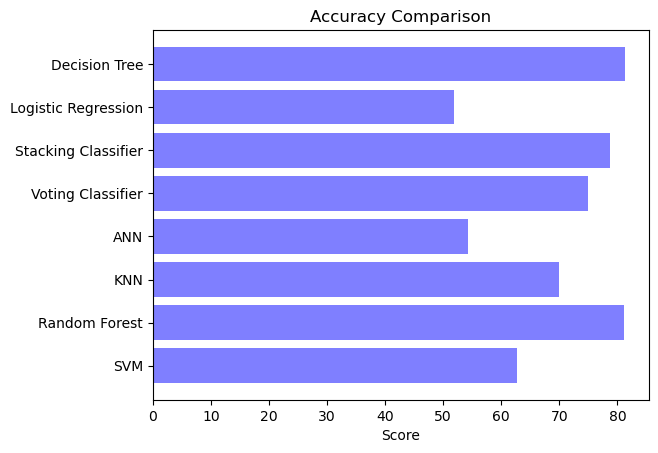

In [139]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [140]:
results ={'Accuracy': [svm_result*100,rf_result*100,knn_result*100,ann_result*100,eclf_result*100,sc_result*100,log_result*100,dc_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_knn*100,recall_ann*100,recall_eclf*100,recall_sc*100,recall_log*100,recall_dc*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_knn*100,precision_ann*100,precision_eclf*100,precision_sc*100,precision_log*100,precision_dc*100]}
index = ['SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree']

In [141]:
results =pd.DataFrame(results,index=index)

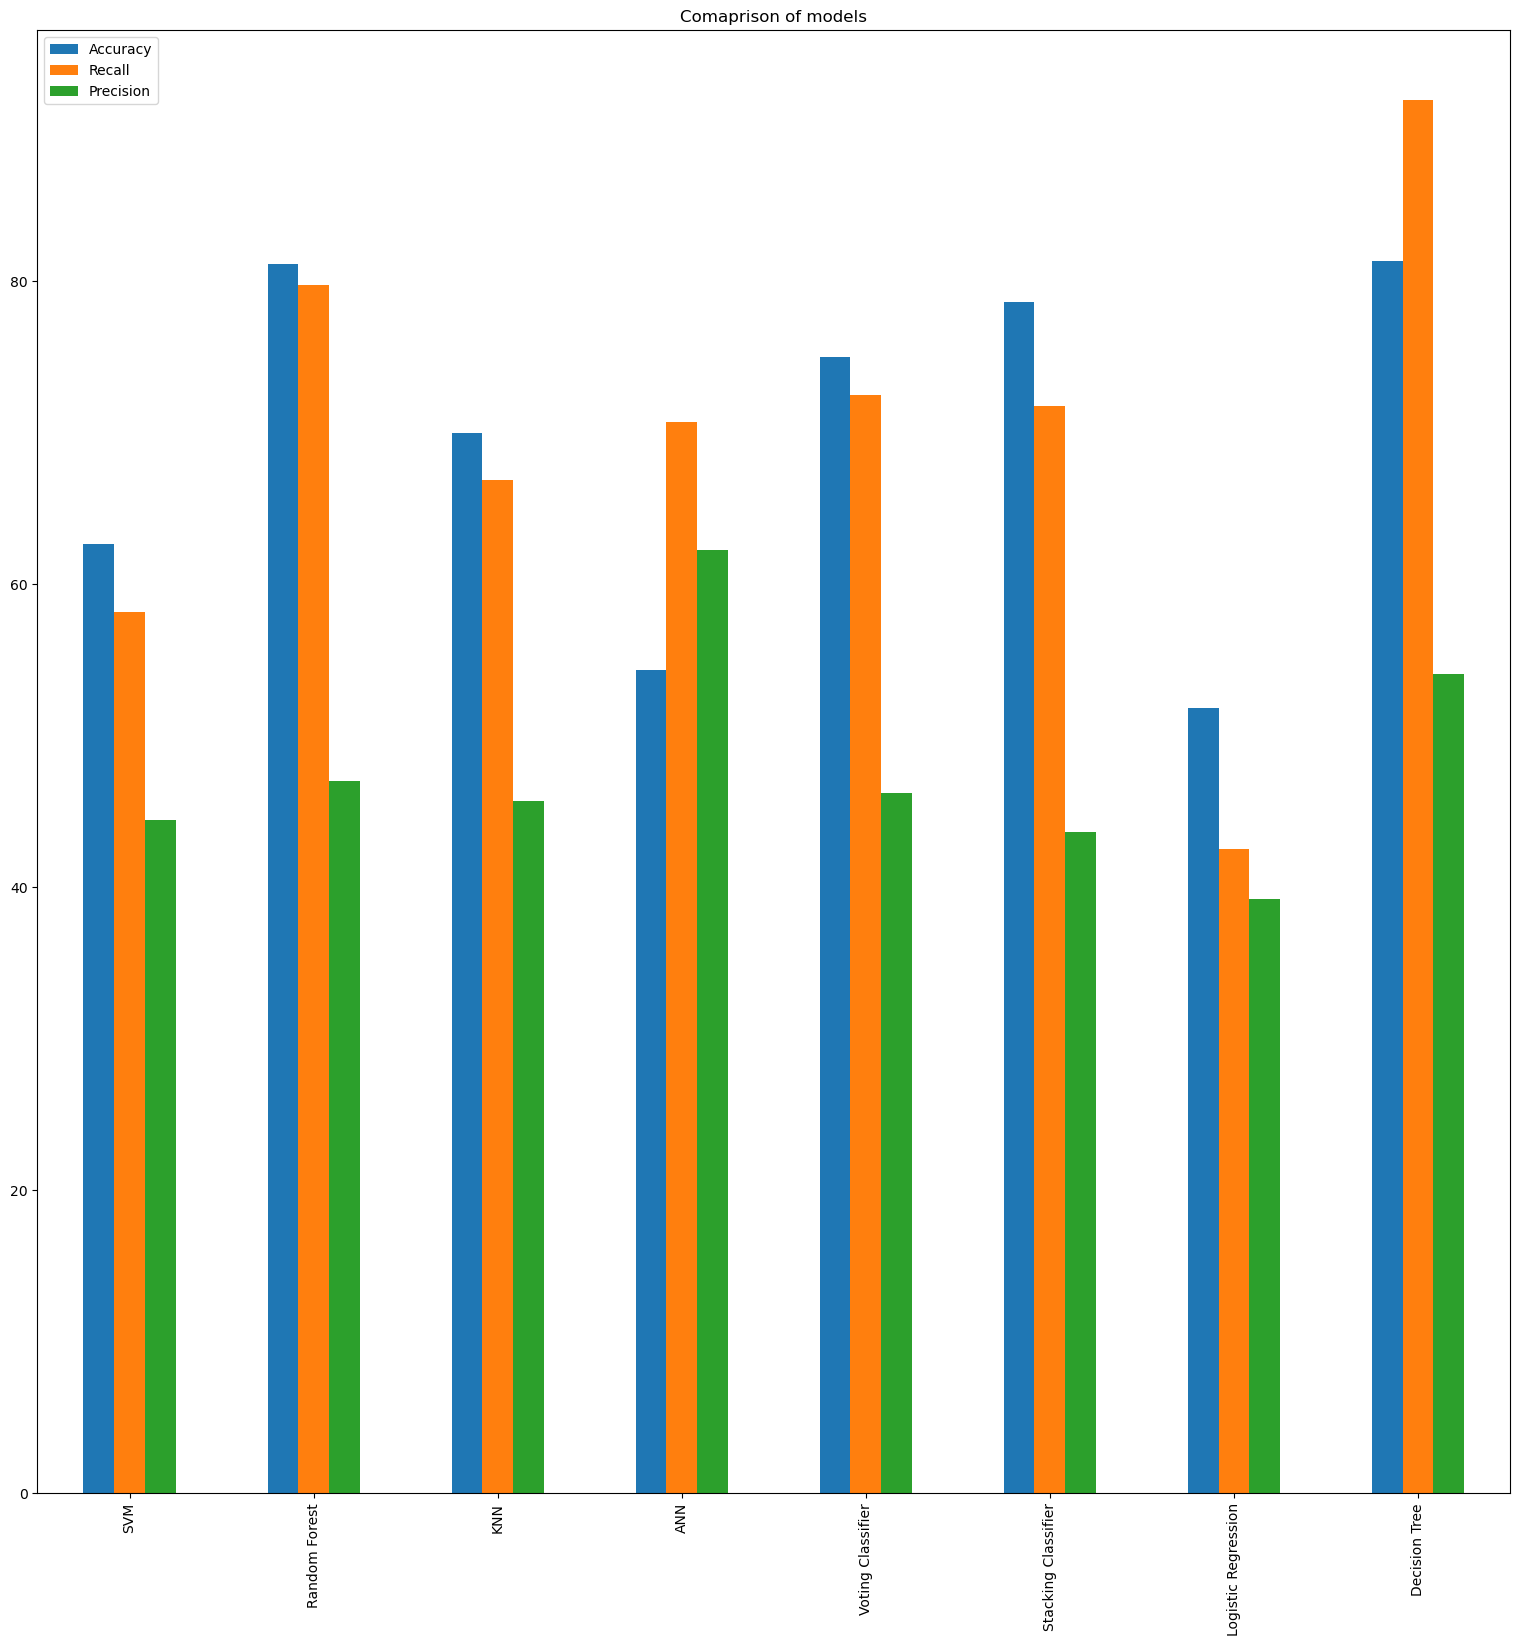

In [142]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('acc.png')

This project includes prediction of lung cancer using Multi linear Regression.

In [149]:
import pickle

with open("lung_cancer_model.pkl", "wb") as f:
    pickle.dump(classifier, f)

print("✅ Model saved successfully as lung_cancer_model.pkl")


✅ Model saved successfully as lung_cancer_model.pkl


# Thanks for visiting my notebook..